In [93]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [98]:
#importing original data:
odata = (np.loadtxt('mos2.disp')[:, 1])
pd.DataFrame(odata).head()

,0
0,-0.000003
1,-0.000003
2,0.000004
3,236.607194
4,236.624074


In [95]:
#function to calculate the losses using the orginal and test dataset

def freq(x):
    os.system('sed -e s/knn1/%.1f/g lc.gin > lc_loop.gin' % x[0])
    os.system('sed -i.bak -es/knn2/%.1f/g lc_loop.gin' %x[1])
    
    '''You can add more variables over here in the #tagged lines'''
    #os.system('sed -i.bak -es/knn2/%.1f/g lc_loop.gin' %x[1])
    #os.system('sed -i.bak -es/knn2/%.1f/g lc_loop.gin' %x[1])
    #os.system('sed -i.bak -es/knn2/%.1f/g lc_loop.gin' %x[1])
    #os.system('sed -i.bak -es/knn2/%.1f/g lc_loop.gin' %x[1])
    #os.system('sed -i.bak -es/knn2/%.1f/g lc_loop.gin' %x[1])
    
    os.system('sed -i.bak -e s/fname/tset/g lc_loop.gin')
    os.system('gulp < lc_loop.gin')
    tdata = (np.loadtxt('tset.disp')[:, 1])
    return tdata
def loss_calc(o, t):
    odata = pd.DataFrame(o)
    tdata = pd.DataFrame(t)
    l = (odata - tdata)*(odata - tdata)
    loss = np.sum(l)
    loss = loss/len(odata)
    return float(loss)
def loss(k):
    return loss_calc(odata, freq(k))

In [96]:
#modelling:

from scipy.optimize import minimize

#input the initial guess over here
k = [5 , 4 ]

sol = minimize(loss, k, method = "nelder-mead")

[ 4.96655273  2.00859375]
0.0


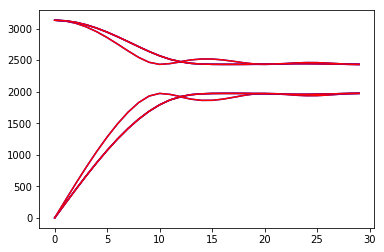

In [97]:
print sol.x
print loss(sol.x)
for n in range(6):
    plt.plot(odata.reshape(len(odata)//6,6)[:,n], color = 'blue')
    plt.plot(freq(sol.x).reshape(len(odata)//6,6)[:,n], color = 'red')


In [52]:
'''Create your own script and be proud of it :p '''


def findk(k):
    T =1000
    while(T):
        k1 = k+0.1
        k2 = k-0.1
        lossk = loss(k)
        lossk1 = loss(k1)
        lossk2 = loss(k2)
        if (lossk1>lossk) & (lossk2>lossk):
            return k
        if(lossk1>=lossk):
            k = k2
        if(lossk2>=lossk):
            k = k1
        T = T-1
